##### 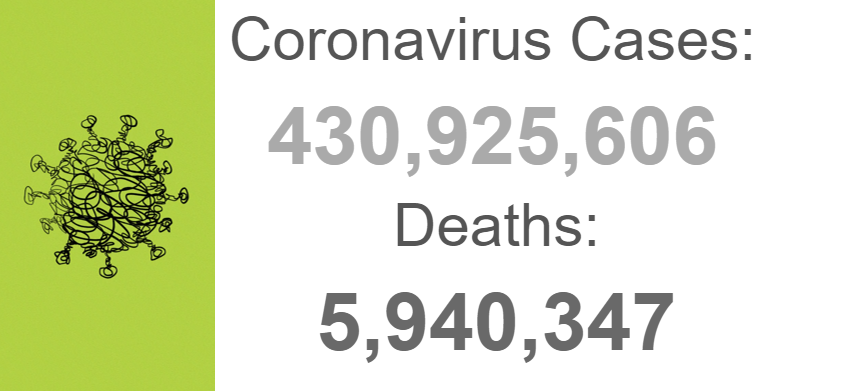

#  <font color='green'> Introduction: </font>
The COVID-19 pandemic, also known as the coronavirus pandemic, is an ongoing global pandemic. The World Health Organization (WHO) declared a Public Health Emergency of International Concern on 30 January 2020 and a pandemic on 11 March 2020. As of 20 February 2022, the pandemic had caused more than 423 million cases and 5.88 million deaths, making it one of the deadliest in history.

We were looking for an interesting and relevant topic for the project and what is more interesting than the corona which has been an integral part of our lives for more than two years.

In this project we gathered worldwide data about the corona pandemic from various sources in order to build a model. Using what we have learnd in class (and with a "little" help from the internet), this model will eventually predict the number of deaths caused by the corona virus in each country.


###  <font color='green'> Our data: </font>
We have data from about 226 Countries and we use them to build our model. Some of the columns in the data are irrelevant for this model, thus, we will list below the main columns and later on we will expalin our steps in building the best possible model.

####  <font color='green'> Columns: </font>
  - "vaccenatedPercent" : The percentage of vaccinated people for covid-19 per country (at least one dose).
  - "TotCases1MPop" : The number people infected with covid-19 per million people in the country.
  - "TotalRecovered1MPop" : The numbers of recovered patients from covid-19 per million people in the country.
  - "Critical1MPop" : The numbers of patients in critical condition from covid-19 per million people in the country.
  - "Tests1MPop" : The numbers of covid-19 Tests performed per million people in the country.
  - "Population" : The population count.
  - "ActiveCases1MPop" : The numbers of active cases of covid-19 per million people in the country.
  
####  <font color='green'> The column we want to predict: </font>  
  - "Deaths1MPop" : The numbers of deaths caused by covid-19 per million people in the country.





### <font color='green'> imports: </font>

In [161]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

### Scraping a table from wikipedia with the help of the command 'read_html'

In [162]:
url = "https://he.wikipedia.org/wiki/%D7%AA%D7%91%D7%A0%D7%99%D7%AA:%D7%A8%D7%99%D7%9B%D7%95%D7%96_%D7%98%D7%91%D7%9C%D7%90%D7%95%D7%AA_%D7%9E%D7%92%D7%A4%D7%AA_%D7%94%D7%A7%D7%95%D7%A8%D7%95%D7%A0%D7%94"
df=pd.read_html(url, skiprows=3)
df = df[0]
df.head(10)

,0,1,2,3,4,5,6,7,8
0,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3],NaN
1,231 מדינות/טריטוריות + 2 ספינות,435359984,54905,75917,5966071,752,60.15%,53.47%,NaN
2,ארצות הברית[4] / [ערך],80560293,241047,8636,972930,2911,79.87%,66.61%,NaN
3,הודו / [ערך],42916117,30601,8944,513756,366,68.83%,56.20%,NaN
4,ברזיל / [ערך],28744050,133658,8318,648989,3018,82.56%,71.92%,NaN
5,צרפת / [ערך],22646732,345687,2484,138059,2107,82.32%,79.73%,NaN
6,הממלכה המאוחדת / [ערך],18804765,274621,289,161224,2354,NaN,NaN,NaN
7,רוסיה / [ערך],16291116,111554,2300,350927,2403,NaN,NaN,NaN
8,גרמניה / [ערך],14649897,173934,2494,123297,1464,75.31%,74.41%,NaN
9,טורקיה / [ערך],13975389,162810,1128,94026,1095,NaN,NaN,NaN


## The process of cleaning the data:

### Checking for null values

In [163]:
df.isnull().sum()


0      2
1      6
2     15
3      6
4    160
5    309
6    401
7    462
8    660
dtype: int64

### Removing the 8th column (all null)

In [164]:
del df[8]


### Changing the first row to be the title 

In [165]:
df.columns = df. iloc[0]
df = df. drop(0)
df = df. reset_index(drop=True)
df.head()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
0,231 מדינות/טריטוריות + 2 ספינות,435359984,54905,75917,5966071,752,60.15%,53.47%
1,ארצות הברית[4] / [ערך],80560293,241047,8636,972930,2911,79.87%,66.61%
2,הודו / [ערך],42916117,30601,8944,513756,366,68.83%,56.20%
3,ברזיל / [ערך],28744050,133658,8318,648989,3018,82.56%,71.92%
4,צרפת / [ערך],22646732,345687,2484,138059,2107,82.32%,79.73%


### Removing the first row (irrelevant)

In [166]:
df = df. drop(0)
df.head()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
1,ארצות הברית[4] / [ערך],80560293,241047,8636,972930,2911,79.87%,66.61%
2,הודו / [ערך],42916117,30601,8944,513756,366,68.83%,56.20%
3,ברזיל / [ערך],28744050,133658,8318,648989,3018,82.56%,71.92%
4,צרפת / [ערך],22646732,345687,2484,138059,2107,82.32%,79.73%
5,הממלכה המאוחדת / [ערך],18804765,274621,289,161224,2354,NaN,NaN


In [167]:
df.tail()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
655,קלקיליה,14008,204,13529,NaN,NaN,NaN,NaN
656,סלפית,11878,109,11731,NaN,NaN,NaN,NaN
657,טובאס,8578,92,8315,NaN,NaN,NaN,NaN
658,יריחו,8083,65,7929,NaN,NaN,NaN,NaN
659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Only the first 226 rows contain countries (we know that from going over the data on the website), therefore we will delete the unwanted columns

In [168]:
for i in range (227,660):
    df = df.drop(i)

In [169]:
df.tail()

,מדינה / טריטוריה,מקרי הדבקה,למליון,במצב קשה,מקרי מוות,למליון,חוסנו[3],מלא[3]
222,איי קוק,10,568,?,0,NaN,NaN,NaN
223,MS Zaandam‏ (אנ') אוניית תענוגות,9,NaN,0,2,NaN,NaN,NaN
224,איי מרשל,7,117,0,0,NaN,NaN,NaN
225,סנט הלנה,2,327,0,0,NaN,NaN,NaN
226,מיקרונזיה,1,9,0,0,NaN,NaN,NaN


###  At this point we noticed that we have many null values so we searched for another table in order to fill the missing data.

### We found a table with all the countries and their percentage of vaccinated people.

In [170]:
url = "https://en.wikipedia.org/wiki/COVID-19_vaccine"
df2 =pd.read_html(url, skiprows=1)
df2 = df2[1]
df2.head(10)

,Unnamed: 0,World[d],"4,934,325,612",62.7%
0,NaN,China,1269302000,87.9%
1,NaN,India,965336168,69.3%
2,NaN,European Union,335215913,75.0%
3,NaN,United States[e],253395029,76.3%
4,NaN,Indonesia,190672288,69.0%
5,NaN,Brazil,177544796,83.0%
6,NaN,Pakistan,124309711,55.2%
7,NaN,Bangladesh,103358935,62.1%
8,NaN,Japan,101672246,80.7%
9,NaN,Mexico,85113370,65.3%


In [171]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     0 non-null      float64
 1   World[d]       221 non-null    object 
 2   4,934,325,612  221 non-null    int64  
 3   62.7%          221 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.0+ KB


## Cleaning the data:

In [172]:
del df2['Unnamed: 0'] # allm null
del df2['4,934,325,612'] # population
df2.head()

,World[d],62.7%
0,China,87.9%
1,India,69.3%
2,European Union,75.0%
3,United States[e],76.3%
4,Indonesia,69.0%


In [173]:
df2.rename({'World[d]': 'Country','62.7%':'vaccenated'}, axis=1, inplace=True)
df2.head()

,Country,vaccenated
0,China,87.9%
1,India,69.3%
2,European Union,75.0%
3,United States[e],76.3%
4,Indonesia,69.0%


In [174]:
df2 = df2.replace(regex=[' '], value='') #delete spaces
df2.head()

,Country,vaccenated
0,China,87.9%
1,India,69.3%
2,EuropeanUnion,75.0%
3,UnitedStates[e],76.3%
4,Indonesia,69.0%


### We encountered two problems:
- Our first table "df1" is in Hebrew and we ran in to problems when trying to download the translation library. 
- We still have a lack of data.

### So we kept on searching for more data.

### For this table we had to use a different technique for web scraping.


In [175]:

url = "https://www.worldometers.info/coronavirus/?utm_campaign=homeAdvegas1?/embed/fd0k_hbXWcQ"

res = requests.get(url) #our requests object 
soup = bs(res.content, 'html.parser') # using beautifulsoup 

table_data = soup.select_one('#main_table_countries_today') #scraping the table tag


In [176]:
# creating data frame with the table colums 
headers = []
for i in table_data.find_all('th'):
    title = i.text
    headers.append(title)
df3 = pd.DataFrame(columns = headers)

In [177]:
#adding to the data frame the values in each row from the table
for j in table_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [tr.text for tr in row_data]
        length = len(df3)
        
        df3.loc[length] = row
df3.head() 

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"94,795,709","+14,107","1,400,893",+331,"65,456,888","+14,950","27,937,928","14,874",...,,,,North America,\n,,,,,
1,,\nAsia\n,"115,911,462","+328,945","1,346,107","+1,051","107,006,362","+217,931","7,558,993","30,835",...,,,,Asia,\n,,,,,
2,,\nSouth America\n,"54,184,955","+23,843","1,256,749",+131,"47,650,041","+29,311","5,278,165","13,395",...,,,,South America,\n,,,,,
3,,\nEurope\n,"155,432,502","+285,933","1,705,472","+1,352","131,789,768","+743,133","21,937,262","14,773",...,,,,Europe,\n,,,,,
4,,\nAfrica\n,"11,514,116","+1,525","249,086",+13,"10,599,562","+3,753","665,468","1,847",...,,,,Africa,\n,,,,,


In [178]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    242 non-null    object
 1   Country,Other        242 non-null    object
 2   TotalCases           242 non-null    object
 3   NewCases             242 non-null    object
 4   TotalDeaths          242 non-null    object
 5   NewDeaths            242 non-null    object
 6   TotalRecovered       242 non-null    object
 7   NewRecovered         242 non-null    object
 8   ActiveCases          242 non-null    object
 9   Serious,Critical     242 non-null    object
 10  Tot Cases/1M pop     242 non-null    object
 11  Deaths/1M pop        242 non-null    object
 12  TotalTests           242 non-null    object
 13  Tests/
1M pop
       242 non-null    object
 14  Population           242 non-null    object
 15  Continent            242 non-null    object
 16  1 Caseev

## More cleaning...

In [179]:
df3 = df3.replace(regex=['\n'], value='')
df3 = df3.replace(regex=[' '], value='')
df3 = df3.replace(regex=[','], value='')

### We noticed that some of countries have a different name from "df2" so we changed the ones we found

In [180]:

df2['Country'] = df2['Country'].replace(['UnitedStates[e]'],'USA')
df2['Country'] = df2['Country'].replace(['UnitedKingdom'],'UK')
df2['Country'] = df2['Country'].replace(['Italy[f]'],'Italy')
df2['Country'] = df2['Country'].replace(['SouthKorea'],'S.Korea')
df2.head(20)

,Country,vaccenated
0,China,87.9%
1,India,69.3%
2,EuropeanUnion,75.0%
3,USA,76.3%
4,Indonesia,69.0%
5,Brazil,83.0%
6,Pakistan,55.2%
7,Bangladesh,62.1%
8,Japan,80.7%
9,Mexico,65.3%


#### We noticed that the columns with 'new' cases/deaths/recovered.. are missing data. In any case, our assumption is that there isn't a strong covariance between them and the column "TotalDeaths", therefore we decided to drop those columns.

In [181]:
del df3['NewCases'] # mostly null values
del df3['NewDeaths'] # mostly null values
del df3['NewRecovered'] # mostly null values
del df3['Continent'] # irrelevent
del df3['New Deaths/1M pop'] # mostly null values
del df3['New Cases/1M pop'] # mostly null values
del df3['TotalCases'] # we have per 1M
del df3['TotalDeaths'] # we have per 1M
del df3['TotalTests'] # we have per 1M
del df3['ActiveCases'] # we have per 1M
del df3['1 Caseevery X ppl'] # we have per 1M
del df3['1 Deathevery X ppl'] # we have per 1M
del df3['1 Testevery X ppl'] # we have per 1M
del df3['#'] # irrelevent


df3.head()

,"Country,Other",TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
0,NorthAmerica,65456888,14874,,,,,
1,Asia,107006362,30835,,,,,
2,SouthAmerica,47650041,13395,,,,,
3,Europe,131789768,14773,,,,,
4,Africa,10599562,1847,,,,,


### Dropping the first 7 rows which are irrelevent (Continents and the whole world)

In [182]:
for i in range (0,8):
    df3 = df3.drop(i)
df3.head()

,"Country,Other",TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
8,USA,53037045,8636,241047,2911,2835143,334210037,79442
9,India,42290921,8944,30601,366,546010,1402420930,79
10,Brazil,26082511,8318,133658,3018,296556,215056109,9358
11,France,20666313,2484,345687,2107,3764642,65512203,28122
12,UK,17153253,289,274621,2354,7014818,68475295,21764


In [183]:
df3.rename({'Country,Other': 'Country'}, axis=1, inplace=True)
df3.head()

,Country,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
8,USA,53037045,8636,241047,2911,2835143,334210037,79442
9,India,42290921,8944,30601,366,546010,1402420930,79
10,Brazil,26082511,8318,133658,3018,296556,215056109,9358
11,France,20666313,2484,345687,2107,3764642,65512203,28122
12,UK,17153253,289,274621,2354,7014818,68475295,21764


### Merging "df2" with "df3" 

In [184]:
final_df = pd.merge( df2, df3, how="left", on=["Country", "Country"])
final_df.head()

,Country,vaccenated,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
0,China,87.9%,101868,19,76,3,111163,1439323776,2
1,India,69.3%,42290921,8944,30601,366,546010,1402420930,79
2,EuropeanUnion,75.0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,76.3%,53037045,8636,241047,2911,2835143,334210037,79442
4,Indonesia,69.0%,4817423,2911,19904,532,303166,278302189,2062


In [185]:
final_df.isnull().sum()

Country                 0
vaccenated              0
TotalRecovered         23
Serious,Critical       23
Tot Cases/1M pop       23
Deaths/1M pop          23
Tests/\n1M pop\n       23
Population             23
Active Cases/1M pop    23
dtype: int64

### We found 23 Countries that didn't have a match in both tables. We decided to delete them because we assume that the column of the percentage of vaccination is more important for the model. 
#### In a different version we tried to fill them using the interpolate() function but we didn't get the best score.

In [186]:
final_df.shape

(221, 9)

In [187]:
final_df = final_df.dropna()
final_df.isnull().sum()

Country                0
vaccenated             0
TotalRecovered         0
Serious,Critical       0
Tot Cases/1M pop       0
Deaths/1M pop          0
Tests/\n1M pop\n       0
Population             0
Active Cases/1M pop    0
dtype: int64

In [188]:
final_df.shape

(198, 9)

### Changing the column 'Country' to be the leading index

In [189]:
final_df = final_df.set_index('Country')
final_df.head()

,vaccenated,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,,
China,87.9%,101868,19,76,3,111163,1439323776,2
India,69.3%,42290921,8944,30601,366,546010,1402420930,79
USA,76.3%,53037045,8636,241047,2911,2835143,334210037,79442
Indonesia,69.0%,4817423,2911,19904,532,303166,278302189,2062
Brazil,83.0%,26082511,8318,133658,3018,296556,215056109,9358


In [190]:
final_df = final_df.replace(regex=['%'], value='') #to convert to float
final_df = final_df.replace(regex=[''], value=np.nan) 
final_df = final_df.replace(regex=['N/A'], value=np.nan) # empty values
final_df = final_df.replace(regex=[' '], value='') # removing spaces
final_df.isnull().sum()
final_df.tail()


,vaccenated,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,,
Anguilla,68.6,2506,4,166054,591,3375066,15224,854
Burundi,0.1,773,NaN,3051,3,27714,12475170,2986
WallisandFutuna,55.4,438,NaN,41598,641,1879054,10914,825
FalklandIslands,75.6,NaN,NaN,24404,NaN,2366877,3647,1097
Montserrat,37.4,161,NaN,32620,400,1560136,4997,NaN


In [191]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, China to Montserrat
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   vaccenated           198 non-null    object
 1   TotalRecovered       191 non-null    object
 2   Serious,Critical     151 non-null    object
 3   Tot Cases/1M pop     198 non-null    object
 4   Deaths/1M pop        194 non-null    object
 5   Tests/
1M pop
       189 non-null    object
 6   Population           198 non-null    object
 7   Active Cases/1M pop  197 non-null    object
dtypes: object(8)
memory usage: 13.9+ KB


In [192]:
final_df.isnull().sum()

vaccenated              0
TotalRecovered          7
Serious,Critical       47
Tot Cases/1M pop        0
Deaths/1M pop           4
Tests/\n1M pop\n        9
Population              0
Active Cases/1M pop     1
dtype: int64

### We checked why we have so many empty values in the column "Serious,Critical", we thought maybe they have zero serious cases, so we checked online and we found that we were right! -https://www.coronatracker.com/country/georgia/ , https://www.coronatracker.com/country/united-arab-emirates/

In [193]:
final_df['Serious,Critical'].fillna('0', inplace = True)
final_df.tail()

,vaccenated,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,,
Anguilla,68.6,2506,4,166054,591,3375066,15224,854
Burundi,0.1,773,0,3051,3,27714,12475170,2986
WallisandFutuna,55.4,438,0,41598,641,1879054,10914,825
FalklandIslands,75.6,NaN,0,24404,NaN,2366877,3647,1097
Montserrat,37.4,161,0,32620,400,1560136,4997,NaN


In [194]:
final_df = final_df.dropna()

In [195]:
final_df.isnull().sum()

vaccenated             0
TotalRecovered         0
Serious,Critical       0
Tot Cases/1M pop       0
Deaths/1M pop          0
Tests/\n1M pop\n       0
Population             0
Active Cases/1M pop    0
dtype: int64

In [196]:
final_df.shape

(182, 8)

### Casting all columns to float

In [197]:
for i in final_df:
    final_df[i] = final_df[i].astype(float, errors = 'raise')

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, China to WallisandFutuna
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vaccenated           182 non-null    float64
 1   TotalRecovered       182 non-null    float64
 2   Serious,Critical     182 non-null    float64
 3   Tot Cases/1M pop     182 non-null    float64
 4   Deaths/1M pop        182 non-null    float64
 5   Tests/
1M pop
       182 non-null    float64
 6   Population           182 non-null    float64
 7   Active Cases/1M pop  182 non-null    float64
dtypes: float64(8)
memory usage: 12.8+ KB


### Normalization per million population count

In [198]:
for rows in  range (0,145):
    final_df['TotalRecovered'][rows] = final_df['TotalRecovered'][rows] / final_df['Population'][rows] * 1000000  
    final_df['Serious,Critical'][rows] = final_df['Serious,Critical'][rows] / final_df['Population'][rows] * 1000000    
final_df.rename({'TotalRecovered': 'TotalRecovered1MPop','Serious,Critical': 'Critical1MPop' }, axis=1, inplace=True)
final_df.tail()

,vaccenated,TotalRecovered1MPop,Critical1MPop,Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,,
SanMarino,72.2,13703.0,4.0,417252.0,3289.0,3955123.0,34049.0,11513.0
CaribbeanNetherlands,72.3,7444.0,0.0,284083.0,1164.0,1131450.0,26626.0,3343.0
Anguilla,68.6,2506.0,4.0,166054.0,591.0,3375066.0,15224.0,854.0
Burundi,0.1,773.0,0.0,3051.0,3.0,27714.0,12475170.0,2986.0
WallisandFutuna,55.4,438.0,0.0,41598.0,641.0,1879054.0,10914.0,825.0


### Editing columns name

In [199]:

final_df = final_df.set_axis(['vaccenatedPresent','TotalRecovered1MPop', 'Critical1MPop', 'TotCases1MPop', 'Deaths1MPop', 'Tests1MPop','Population', 'ActiveCases1MPop'
], axis=1, inplace=False)


final_df.head()

,vaccenatedPresent,TotalRecovered1MPop,Critical1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop,Population,ActiveCases1MPop
Country,,,,,,,,
China,87.9,70.774903,0.013201,76.0,3.0,111163.0,1.439324e+09,2.0
India,69.3,30155.654480,6.377543,30601.0,366.0,546010.0,1.402421e+09,79.0
USA,76.3,158693.752815,25.840038,241047.0,2911.0,2835143.0,3.342100e+08,79442.0
Indonesia,69.0,17310.043508,10.459853,19904.0,532.0,303166.0,2.783022e+08,2062.0
Brazil,83.0,121282.353342,38.678278,133658.0,3018.0,296556.0,2.150561e+08,9358.0


In [200]:
del final_df['TotalRecovered1MPop'] 
### We later on discoverd that this column complement the column that we wanted to predict and we received data leakage
del final_df['Population'] # not helpful
final_df.head()

,vaccenatedPresent,Critical1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop,ActiveCases1MPop
Country,,,,,,
China,87.9,0.013201,76.0,3.0,111163.0,2.0
India,69.3,6.377543,30601.0,366.0,546010.0,79.0
USA,76.3,25.840038,241047.0,2911.0,2835143.0,79442.0
Indonesia,69.0,10.459853,19904.0,532.0,303166.0,2062.0
Brazil,83.0,38.678278,133658.0,3018.0,296556.0,9358.0


### Removing outliers

In [201]:
final_df_no_out = final_df

In [202]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()
    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************\n')
    
    df = df1.copy()
    return df

In [203]:

final_df_no_out = removeOutlier(final_df.vaccenatedPresent, final_df)
final_df_no_out = removeOutlier(final_df.Critical1MPop, final_df)
final_df_no_out = removeOutlier(final_df.TotCases1MPop, final_df)
final_df_no_out = removeOutlier(final_df.Deaths1MPop, final_df)
final_df_no_out = removeOutlier(final_df.Tests1MPop, final_df)
final_df_no_out = removeOutlier(final_df.ActiveCases1MPop, final_df)

lowerbound:  -27.606989634980472  -------- upperbound:  134.84874787673868
0  number of outliers from  182
 ******************************************************

lowerbound:  -36.07195019918337  -------- upperbound:  60.09961246542016
3  number of outliers from  182
 ******************************************************

lowerbound:  -244923.18580830703  -------- upperbound:  481623.5594346806
1  number of outliers from  182
 ******************************************************

lowerbound:  -2320.3313527132977  -------- upperbound:  4558.441242823188
2  number of outliers from  182
 ******************************************************

lowerbound:  -6932794.7986385515  -------- upperbound:  10061292.710726464
5  number of outliers from  182
 ******************************************************

lowerbound:  -81356.43464549459  -------- upperbound:  113007.4104696704
6  number of outliers from  182
 ******************************************************



In [204]:
final_df_no_out.shape

(176, 6)

In [205]:
final_df.shape

(182, 6)

In [206]:
final_df = final_df_no_out

### We finished the cleaning, now lets analyze our data

### Correlation of features

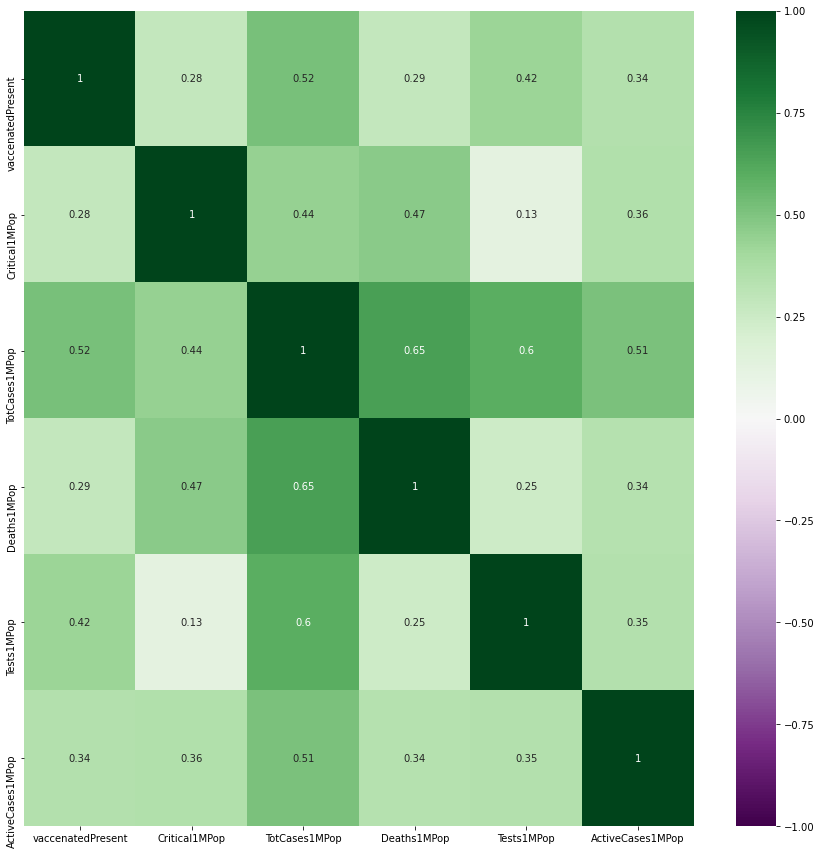

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = final_df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='PRGn', annot=True)
plt.show()

In [208]:
corr[abs(corr['Deaths1MPop']) > 0.3]['Deaths1MPop']

Critical1MPop       0.473262
TotCases1MPop       0.654533
Deaths1MPop         1.000000
ActiveCases1MPop    0.343563
Name: Deaths1MPop, dtype: float64

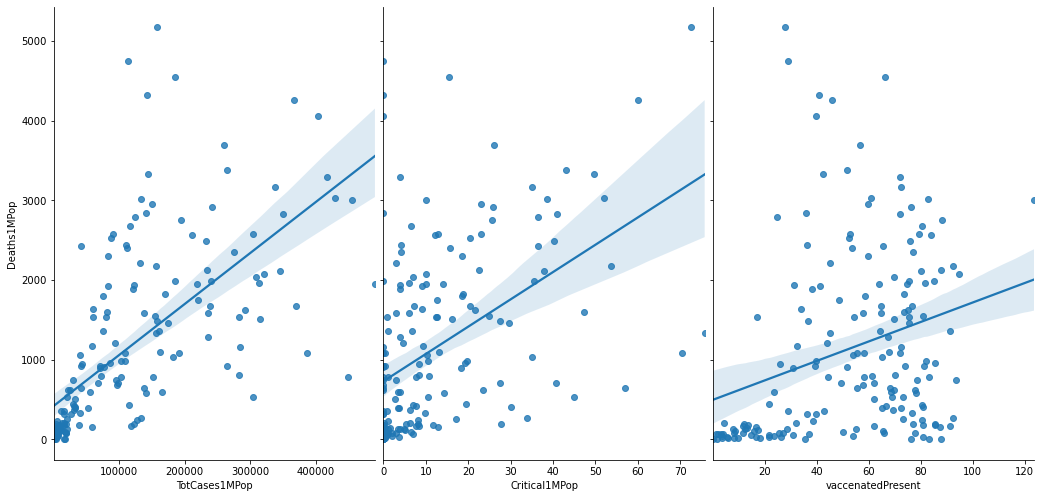

In [209]:

sns.pairplot(final_df, x_vars=['TotCases1MPop','Critical1MPop','vaccenatedPresent'], y_vars='Deaths1MPop', height=7, aspect=0.7, kind='reg')

### As we see, we have columns in our data with a nice covariance with the column we want to predict

### Train-test split

In [210]:
X = final_df.drop("Deaths1MPop", axis=1)
y = final_df["Deaths1MPop"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)


## Scaling the data
#### we are checking two different scalers to see if one of them is better for our model

In [211]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.fit_transform(X_test)
X_train_scaled2 = scaler2.fit_transform(X_train)
X_test_scaled2 = scaler2.fit_transform(X_train)

### Dummy model

In [212]:
dum_regr = DummyRegressor(strategy="mean")
dum_regr.fit(X_train, y_train)
dum_score = dum_regr.score(X_test, y_test)
y_predict = dum_regr.predict(X_test)
mean_absolute_error = MAE(y_test, y_predict)
print('our dummy model R2 score is ' + str(dum_score)[:6])
print( "our dummy mean absolute error is " + str(mean_absolute_error)[:4])

our dummy model R2 score is -0.048
our dummy mean absolute error is 864.


#### If the value of R2 is close to 0, it means that the model will perform badly on an unseen dataset. 

### Linear Regression  model 
#### Using cross validation

In [213]:
linreg = LinearRegression()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_1 = cross_val_score(linreg, X_train_scaled1, y_train, cv=kf)
y_predict_1 = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
mae_1 = MAE(y_train, y_predict_1)

R2_scores_2 = cross_val_score(linreg, X_train_scaled2, y_train, cv=kf)
y_predict_2 = cross_val_predict(linreg, X_train_scaled2, y_train, cv=kf)
mae_2 = MAE(y_train, y_predict_2)

print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_1.mean()))
print("MAE score:" +(str)(mae_1))
print("result for MinMaxScaler:")
print("R2 score:" +(str)(R2_scores_2.mean()))
print("MAE score:" +(str)(mae_2))



result for StandardScaler:
R2 score:0.4438484547270619
MAE score:602.7816923563109
result for MinMaxScaler:
R2 score:0.4438484547270619
MAE score:602.7816923563113


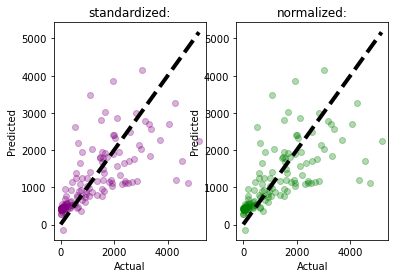

In [214]:
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='purple')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(linreg, X_train_scaled2, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='green')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

### As we can see the Linear Regression model performs better than our dummy model.


In [215]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(linreg.get_params())

Parameters currently in use:

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}


#### We wanted to adjust the Linear Regression hyperparameters in order to improve our model, but as we can see there are no proper hyperparameters for this.

### Random Forest Regressor Model

In [216]:
RFR = RandomForestRegressor()

In [217]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR, X_train_scaled1, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_scaled1, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)
print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))

R2_scores_standardized = cross_val_score(RFR, X_train_scaled2, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_scaled2, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)
print("result for MinMaxScaler:")
print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))

result for StandardScaler:
R2 score:0.5841130816990056
MAE score:492.26242857142853
result for MinMaxScaler:
R2 score:0.5742819001931412
MAE score:498.78792857142855


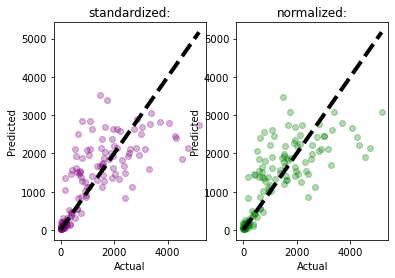

In [218]:
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(RFR, X_train_scaled1, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='purple')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(RFR, X_train_scaled2, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='green')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

### Random forest model performed better then Linear Regression on our data.
### Lets see if we can change our hyperparameter so that our model will perform better.

In [219]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RFR.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### Using Randomized Search to find the best parameters

In [220]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 286, num = 25)] #this is afrer traying bigger range and finding the optimal range
 
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [221]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
rf_random.fit(X_train_scaled1, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 12, 24, 36, 48, 60,
                                                         72, 84, 96, 107, 119,
                                                         131, 143, 155, 167,
                                                         179, 191, 202, 214,
                                     

In [222]:
print("The best R2 score is:")
print(rf_random.best_score_)

The best R2 score is:
0.5784893061643783


In [223]:
rf_random.best_params_

{'n_estimators': 36,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

### Changing the parameters and checking the model score

In [224]:
RFR = RandomForestRegressor(n_estimators =36,min_samples_split = 10,min_samples_leaf = 4,max_features ='sqrt',max_depth = 20,bootstrap = True)


kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR , X_train_scaled1, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR , X_train_scaled1, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)
print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))

R2_scores_standardized = cross_val_score(RFR , X_train_scaled2, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR , X_train_scaled2, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)
print("result for MinMaxScaler:")
print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))


result for StandardScaler:
R2 score:0.5650114146755806
MAE score:508.11302115475263
result for MinMaxScaler:
R2 score:0.5507279135665535
MAE score:525.3733178516032


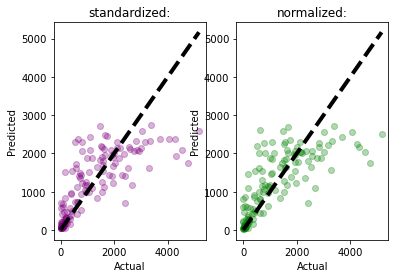

In [225]:
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(RFR, X_train_scaled1, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='purple')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(RFR, X_train_scaled2, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='green')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

### There is almost no difference between the scalers, therefore from here on we will only use Standard Scaler.

### KNN model

#### checking for the best k neighbors

In [226]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
k_r2_scores = []
k_mae_scores = []
k_range = range(30)
for K in k_range:
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    R2_scores_standardized = cross_val_score(model, X_train_scaled1, y_train, cv=kf)
    k_r2_scores.append(R2_scores_standardized.mean())
    y_predict_standardized = cross_val_predict(model, X_train_scaled1, y_train, cv=kf)
    mae_standarsized = MAE(y_train, y_predict_standardized)
    k_mae_scores.append(mae_standarsized)
       
print(k_r2_scores)
print(k_mae_scores)


[0.1413220205229911, 0.35004014808057027, 0.44882103497886094, 0.47016994560168407, 0.5039457205057974, 0.5372205688429841, 0.5143037710750764, 0.5054178973239275, 0.5165679845319252, 0.5291504920897354, 0.5226334225747482, 0.5085084802152384, 0.5037240435896757, 0.5144935963743535, 0.5227798551082325, 0.523695956974762, 0.5108541566688921, 0.4946971303370301, 0.48321562716522026, 0.4787647750309157, 0.4805152238784924, 0.48502090684772536, 0.4759697009625647, 0.4747172896672477, 0.4731928574245847, 0.47037362874452154, 0.45997998725740424, 0.4544655640272156, 0.44918533182695447, 0.4435155006143782]
[696.4357142857143, 636.0857142857143, 594.5238095238094, 561.6410714285714, 543.1385714285714, 526.9035714285715, 537.3704081632653, 542.9008928571428, 535.2793650793651, 534.4692857142858, 534.2116883116884, 543.5369047619048, 546.4857142857143, 549.4576530612244, 551.8347619047619, 547.9241071428571, 555.2878151260504, 562.7242063492063, 567.3958646616541, 569.5360714285713, 566.1969387

Text(0, 0.5, 'Cross-Validated Accuracy')

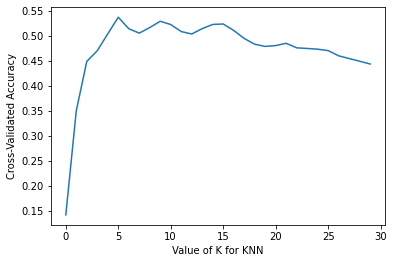

In [227]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_r2_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [228]:
print("Optimal k = "+ (str)(k_r2_scores.index(max(k_r2_scores))+1))

Optimal k = 6


In [229]:
model = neighbors.KNeighborsRegressor(n_neighbors = 6)
R2_scores_standardized = cross_val_score(model, X_train_scaled1, y_train, cv=kf)
k_r2_scores.append(R2_scores_standardized.mean())
y_predict_standardized = cross_val_predict(model, X_train_scaled1, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)


print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))


R2 score:0.5372205688429841
MAE score:526.9035714285715


### Lets have a look at all the scores

In [231]:
data  = {'scores' :['R2','MAE'],
         'dummy':[-0.048, 864],
         'LinearRegression':[0.443, 602.781]
        ,'Random Forest':[0.565, 508.113],
         'KNN': [0.537,526.903]}

data = pd.DataFrame(data) 
final_scores1 = data.set_index('scores')
final_scores1

,dummy,LinearRegression,Random Forest,KNN
scores,,,,
R2,-0.048,0.443,0.565,0.537
MAE,864.000,602.781,508.113,526.903


### We used three different models and received the best score using random forest, but  we were still unhappy with our score. We think that predicting the number of death should have a higher score. The reason may be that we have only 6 features. Therefore, we searched for more features that we think will have a high correlation with the number of deaths.

### We found two tables with the number of beds in hospitals per 1000 people and the number of physicians per 1000 people in the country. (https://data.worldbank.org/indicator/SH.MED.BEDS.ZS)

#### Cleaning the data

In [232]:
df4 = pd.read_csv("C:\\Users\\abiis\\OneDrive\\שולחן העבודה\\מדעי הנתונים\\hospitals_bed_per_1000.csv",skiprows=3)

df4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,1.959677,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.170627,NaN,NaN,NaN,NaN,NaN,...,0.53,0.53,0.5,0.5,0.5,0.39,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.781043,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2.061462,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
df5 = pd.read_csv("C:\\Users\\abiis\\OneDrive\\שולחן העבודה\\מדעי הנתונים\\Physicians_per_1000_ppl.csv",skiprows=3)

df5.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.035,NaN,NaN,NaN,NaN,0.063,...,0.2414,0.2846,0.2983,0.285,0.2782,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,AGO,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.067,NaN,NaN,NaN,NaN,0.076,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN


In [234]:
del df4['Country Code']
del df4['Indicator Name']
del df4['Indicator Code']
df4.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.959677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,0.170627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.53,0.53,0.5,0.5,0.5,0.39,NaN,NaN,NaN,NaN
3,Africa Western and Central,0.781043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,2.061462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
del df5['Country Code']
del df5['Indicator Name']
del df5['Indicator Code']
df5.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.2414,0.2846,0.2983,0.285,0.2782,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN


In [236]:

df4.rename({'Unnamed: 65': 'Hospital_beds'}, axis=1, inplace=True)
df4.rename({'Country Name': 'Country'}, axis=1, inplace=True)
df4.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Hospital_beds
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1.959677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,0.170627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.53,0.53,0.5,0.5,0.5,0.39,NaN,NaN,NaN,NaN
3,Africa Western and Central,0.781043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,2.061462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
df5.rename({'Unnamed: 65': 'Physicians'}, axis=1, inplace=True)
df5.rename({'Country Name': 'Country'}, axis=1, inplace=True)
df5.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Physicians
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.2414,0.2846,0.2983,0.285,0.2782,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN


In [238]:
df4 = df4.replace(regex=[' '], value='')
df5 = df5.replace(regex=[' '], value='')
df5.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Physicians
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AfricaEasternandSouthern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,0.035,NaN,NaN,NaN,NaN,0.063,NaN,NaN,NaN,...,0.2414,0.2846,0.2983,0.285,0.2782,NaN,NaN,NaN,NaN,NaN
3,AfricaWesternandCentral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,0.067,NaN,NaN,NaN,NaN,0.076,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN


In [239]:
df4['Country'] = df4['Country'].replace(['UnitedStates'],'USA')
df5['Country'] = df5['Country'].replace(['UnitedStates'],'USA')

In [240]:
df4 = df4.set_index('Country')
df5 = df5.set_index('Country')

In [241]:
for column in df4:
    df4[column] = df4[column].astype(float, errors = 'raise')
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Aruba to Zimbabwe
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1960           164 non-null    float64
 1   1961           2 non-null      float64
 2   1962           2 non-null      float64
 3   1963           2 non-null      float64
 4   1964           2 non-null      float64
 5   1965           8 non-null      float64
 6   1966           5 non-null      float64
 7   1967           5 non-null      float64
 8   1968           5 non-null      float64
 9   1969           5 non-null      float64
 10  1970           176 non-null    float64
 11  1971           8 non-null      float64
 12  1972           9 non-null      float64
 13  1973           9 non-null      float64
 14  1974           11 non-null     float64
 15  1975           91 non-null     float64
 16  1976           15 non-null     float64
 17  1977           11 non-null     float64
 18  1978  

In [242]:
for column in df5:
    df5[column] = df5[column].astype(float, errors = 'raise')
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, Aruba to Zimbabwe
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1960        137 non-null    float64
 1   1961        18 non-null     float64
 2   1962        16 non-null     float64
 3   1963        16 non-null     float64
 4   1964        16 non-null     float64
 5   1965        108 non-null    float64
 6   1966        19 non-null     float64
 7   1967        17 non-null     float64
 8   1968        17 non-null     float64
 9   1969        17 non-null     float64
 10  1970        146 non-null    float64
 11  1971        28 non-null     float64
 12  1972        24 non-null     float64
 13  1973        26 non-null     float64
 14  1974        23 non-null     float64
 15  1975        85 non-null     float64
 16  1976        28 non-null     float64
 17  1977        29 non-null     float64
 18  1978        27 non-null     float64
 19  1979        37 non-null  

In [243]:
for rows in range(0,227):
    for column in df4:
        if df4[column][rows] > 0:
            df4['Hospital_beds'][rows] = df4[column][rows]
            
for rows in range(0,227):
    for column in df5:
        if df5[column][rows] > 0:
            df5['Physicians'][rows] = df5[column][rows]
            
df4.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Hospital_beds
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AfricaEasternandSouthern,1.959677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.911871
Afghanistan,0.170627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.53,0.53,0.5,0.5,0.5,0.39,NaN,NaN,NaN,0.390000
AfricaWesternandCentral,0.781043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.474776
Angola,2.061462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000


In [244]:
for column in df4:
    if column != 'Hospital_beds':
        del df4[column]
df4.head()

,Hospital_beds
Country,
Aruba,NaN
AfricaEasternandSouthern,0.911871
Afghanistan,0.390000
AfricaWesternandCentral,1.474776
Angola,0.800000


In [245]:
for column in df5:
    if column != 'Physicians':
        del df5[column]
df5.head()

,Physicians
Country,
Aruba,1.120000
AfricaEasternandSouthern,0.191352
Afghanistan,0.278200
AfricaWesternandCentral,0.236817
Angola,0.214600


In [246]:
df4.isnull().sum()

Hospital_beds    54
dtype: int64

In [247]:
df5.isnull().sum()

Physicians    47
dtype: int64

In [248]:
df4 = df4.dropna()
df4.head()

,Hospital_beds
Country,
AfricaEasternandSouthern,0.911871
Afghanistan,0.390000
AfricaWesternandCentral,1.474776
Angola,0.800000
Albania,2.890000


In [249]:
df5 = df5.dropna()
df5.head()

,Physicians
Country,
Aruba,1.120000
AfricaEasternandSouthern,0.191352
Afghanistan,0.278200
AfricaWesternandCentral,0.236817
Angola,0.214600


In [250]:
df4 = df4.replace(regex=[' '], value='')
df5 = df5.replace(regex=[' '], value='')

In [251]:
df45= pd.merge(df5, df4, how="left", on="Country")

In [252]:
df45.head()

,Physicians,Hospital_beds
Country,,
Aruba,1.120000,NaN
AfricaEasternandSouthern,0.191352,0.911871
Afghanistan,0.278200,0.390000
AfricaWesternandCentral,0.236817,1.474776
Angola,0.214600,0.800000


In [253]:
df45.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, Aruba to Seychelles
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Physicians     219 non-null    float64
 1   Hospital_beds  212 non-null    float64
dtypes: float64(2)
memory usage: 5.1+ KB


In [254]:
df45 = df45.dropna()
df45.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, AfricaEasternandSouthern to Seychelles
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Physicians     212 non-null    float64
 1   Hospital_beds  212 non-null    float64
dtypes: float64(2)
memory usage: 5.0+ KB


In [255]:
final_df2 = pd.merge(final_df, df45, how="left", on="Country")
final_df2.head()

,vaccenatedPresent,Critical1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop,ActiveCases1MPop,Physicians,Hospital_beds
Country,,,,,,,,
China,87.9,0.013201,76.0,3.0,111163.0,2.0,1.9798,4.31
India,69.3,6.377543,30601.0,366.0,546010.0,79.0,0.9281,0.53
USA,76.3,25.840038,241047.0,2911.0,2835143.0,79442.0,NaN,NaN
Indonesia,69.0,10.459853,19904.0,532.0,303166.0,2062.0,0.4651,1.04
Brazil,83.0,38.678278,133658.0,3018.0,296556.0,9358.0,2.3106,2.09


In [256]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, China to WallisandFutuna
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vaccenatedPresent  176 non-null    float64
 1   Critical1MPop      176 non-null    float64
 2   TotCases1MPop      176 non-null    float64
 3   Deaths1MPop        176 non-null    float64
 4   Tests1MPop         176 non-null    float64
 5   ActiveCases1MPop   176 non-null    float64
 6   Physicians         129 non-null    float64
 7   Hospital_beds      129 non-null    float64
dtypes: float64(8)
memory usage: 12.4+ KB


In [257]:
final_df2.head()

,vaccenatedPresent,Critical1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop,ActiveCases1MPop,Physicians,Hospital_beds
Country,,,,,,,,
China,87.9,0.013201,76.0,3.0,111163.0,2.0,1.9798,4.31
India,69.3,6.377543,30601.0,366.0,546010.0,79.0,0.9281,0.53
USA,76.3,25.840038,241047.0,2911.0,2835143.0,79442.0,NaN,NaN
Indonesia,69.0,10.459853,19904.0,532.0,303166.0,2062.0,0.4651,1.04
Brazil,83.0,38.678278,133658.0,3018.0,296556.0,9358.0,2.3106,2.09


In [258]:
final_df2 = final_df2.dropna()
final_df2.shape

(129, 8)

### Removing outliers for the new two features

In [259]:
final_df2_no_out = final_df2

In [260]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()
    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************\n')
    
    df = df1.copy()
    return df

In [261]:
final_df2_no_out = removeOutlier(final_df2_no_out.Physicians, final_df2_no_out)
final_df2_no_out = removeOutlier(final_df2_no_out.Hospital_beds, final_df2_no_out)

lowerbound:  -3.8256493802740565  -------- upperbound:  8.141452481049251
1  number of outliers from  129
 ******************************************************

lowerbound:  -4.561301863294679  -------- upperbound:  10.383153106061231
3  number of outliers from  128
 ******************************************************



In [262]:
final_df2 = final_df2_no_out
final_df2.shape

(125, 8)

In [263]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, China to Burundi
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vaccenatedPresent  125 non-null    float64
 1   Critical1MPop      125 non-null    float64
 2   TotCases1MPop      125 non-null    float64
 3   Deaths1MPop        125 non-null    float64
 4   Tests1MPop         125 non-null    float64
 5   ActiveCases1MPop   125 non-null    float64
 6   Physicians         125 non-null    float64
 7   Hospital_beds      125 non-null    float64
dtypes: float64(8)
memory usage: 8.8+ KB


In [264]:
corr = final_df2.corr()
corr[abs(corr['Deaths1MPop']) > 0.0]['Deaths1MPop']

vaccenatedPresent    0.274216
Critical1MPop        0.478335
TotCases1MPop        0.622944
Deaths1MPop          1.000000
Tests1MPop           0.192767
ActiveCases1MPop     0.330464
Physicians           0.618923
Hospital_beds        0.569338
Name: Deaths1MPop, dtype: float64

#### As we expected the columns "Physicians" and "Hospital_beds" have a high correlation with the numbers of deaths.

### Train test split

In [265]:
X = final_df2.drop("Deaths1MPop", axis=1)
y = final_df2["Deaths1MPop"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)

In [266]:
scaler1 = StandardScaler()

X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.fit_transform(X_test)

### Dummy model

In [267]:
dum_regr = DummyRegressor(strategy="mean")
dum_regr.fit(X_train, y_train)
dum_score = dum_regr.score(X_test, y_test)
y_predict = dum_regr.predict(X_test)
mean_absolute_error = MAE(y_test, y_predict)
print('our dummy model R squared score is ' + str(dum_score)[:6])
print( "our dummy mean absolute error is " + str(mean_absolute_error)[:4])

our dummy model R squared score is -0.012
our dummy mean absolute error is 958.


### Linear Regression model

In [268]:
linreg = LinearRegression()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_1 = cross_val_score(linreg, X_train_scaled1, y_train, cv=kf)
y_predict_1 = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
mae_1 = MAE(y_train, y_predict_1)

print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_1.mean()))
print("MAE score:" +(str)(mae_1))

result for StandardScaler:
R2 score:0.40406028605199823
MAE score:595.2188368192194


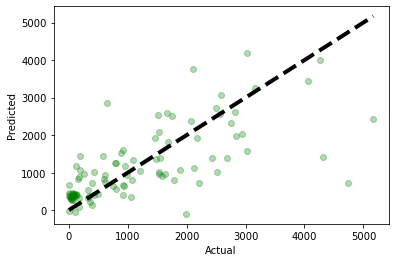

In [269]:
y_predicted = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
plt.scatter(y_train, y_predicted, alpha=0.3, color='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

### Random Forest Regressor model
#### We will use the optimal hyperparameters from the previous Random Forest training.

In [270]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR, X_train_scaled1, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_scaled1, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)
print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))


result for StandardScaler:
R2 score:0.4340681152976392
MAE score:558.8319566552658


### KNN model

In [271]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
k_r2_scores = []
k_mae_scores = []
k_range = range(30)
for K in k_range:
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    R2_scores_standardized = cross_val_score(model, X_train_scaled1, y_train, cv=kf)
    k_r2_scores.append(R2_scores_standardized.mean())
    y_predict_standardized = cross_val_predict(model, X_train_scaled1, y_train, cv=kf)
    mae_standarsized = MAE(y_train, y_predict_standardized)
    k_mae_scores.append(mae_standarsized)
    
    
print(k_r2_scores)
print(k_mae_scores)



[0.2980776375520776, 0.40972299694012726, 0.3760085213865199, 0.3557016943088451, 0.3816326080829533, 0.3875215101439634, 0.39033796821765365, 0.39799848186881825, 0.39263975773013143, 0.38633619664369606, 0.37406830081795694, 0.3896829635593443, 0.39159924416257963, 0.3804905415963713, 0.3848814919952842, 0.38885491604640054, 0.4020686460342562, 0.3953514037912423, 0.3834710683415382, 0.38435771111444583, 0.3805380484323353, 0.3764857078072586, 0.38223493363670297, 0.3842063637484041, 0.3795766629929103, 0.3773978239229865, 0.3787481854072773, 0.37588332755748627, 0.36997249704357243, 0.3561153547052952]
[635.28, 558.285, 537.8066666666668, 547.9175, 537.7220000000001, 543.6783333333333, 546.0928571428572, 538.94625, 550.2188888888888, 560.684, 562.3118181818182, 557.3933333333334, 561.0976923076922, 571.4192857142857, 570.6606666666665, 579.39375, 579.0564705882354, 583.563888888889, 594.2752631578946, 601.5525000000001, 604.3542857142857, 609.4686363636365, 604.4665217391304, 608.58

Text(0, 0.5, 'Cross-Validated Accuracy')

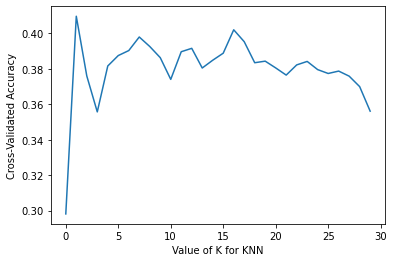

In [272]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_r2_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [273]:
print("Optimal k = "+ (str)(k_r2_scores.index(max(k_r2_scores))+1))



Optimal k = 2


In [274]:
model = neighbors.KNeighborsRegressor(n_neighbors = 2)
R2_scores_standardized = cross_val_score(model, X_train_scaled1, y_train, cv=kf)
k_r2_scores.append(R2_scores_standardized.mean())
y_predict_standardized = cross_val_predict(model, X_train_scaled1, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)


print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))

R2 score:0.40972299694012726
MAE score:558.285


### Lets have a look at all the scores

In [275]:
data  = {'scores' :['R2','MAE'],
         'dummy':[-0.012, 958],
         'LinearRegression':[0.404, 595.218]
        ,'Random Forest':[0.434, 558.831],
         'KNN': [0.409,558.285]}

data = pd.DataFrame(data) 
final_scores2 = data.set_index('scores')
final_scores2

,dummy,LinearRegression,Random Forest,KNN
scores,,,,
R2,-0.012,0.404,0.434,0.409
MAE,958.000,595.218,558.831,558.285


### To our suprise adding these two new features didn't improve our model score. Our speculation is that we had to give up some rows (in order to merge the features) and the  number of entries in this small data set is more important than the numbers of features. 
### Lets test this theory by adding more entries (splliting the USA into states) to "final_df"

In [276]:
url = "https://en.wikipedia.org/wiki/COVID-19_vaccination_in_the_United_States"
df7 =pd.read_html(url, skiprows=1)
df7 = df7[2]
df7.head(10)



,Alabama,"2,489,954",58.1%
0,Alaska,473411,64.7%
1,Arizona,4858243,66.7%
2,Arkansas,1881140,62.3%
3,California,32416845,82.0%
4,Colorado,4262561,74.0%
5,Connecticut,3128940,87.8%
6,Delaware,741038,76.1%
7,Florida,15887600,74.0%
8,Georgia,6439993,60.7%
9,Hawaii,1219631,86.1%


In [277]:
del df7['2,489,954']
df7.head()

,Alabama,58.1%
0,Alaska,64.7%
1,Arizona,66.7%
2,Arkansas,62.3%
3,California,82.0%
4,Colorado,74.0%


In [278]:
df7.rename({'Alabama': 'Country','58.1%':'vaccenated'}, axis=1, inplace=True)

In [279]:
df7.iloc[-1] = ['Alabama', '58.1%']
df7.tail()

,Country,vaccenated
58,Marshall Islands,33.5%
59,Micronesia,47.3%
60,Palau,87.0%
61,Compact of Free Association,55.9%
62,Alabama,58.1%


In [280]:
df7 = df7.replace(regex=[' '], value='')
df7.head()

,Country,vaccenated
0,Alaska,64.7%
1,Arizona,66.7%
2,Arkansas,62.3%
3,California,82.0%
4,Colorado,74.0%


In [281]:
url = "https://www.worldometers.info/coronavirus/country/us/"

res = requests.get(url)
soup = bs(res.content, 'html.parser')

table_data = soup.select_one('#usa_table_countries_today')

res

<Response [200]>

In [282]:
headers = []
for i in table_data.find_all('th'):
    title = i.text
    headers.append(title)


df6 = pd.DataFrame(columns = headers)

df6.shape

(0, 15)

In [283]:
for j in table_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [tr.text for tr in row_data]
        length = len(df6)
        df6 = df6.append(pd.Series(row, index=df6.columns[:len(row)]), ignore_index=True)
df6.head()

,#,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Source,Projections
0,,USA Total,"80,560,293",,"972,930",,"53,037,045","26,550,318","243,383","2,939","947,533,088","2,862,615",,,
1,1,\nCalifornia,"8,959,354",\n,"\n85,202",,\nN/A,\nN/A,"226,749","2,156","\n146,476,848","3,707,127","\n39,512,223",\n[view by county] [1],\n[projections]\n
2,2,\nTexas,"6,624,359",\n,"\n85,123",,\nN/A,\nN/A,"228,459","2,936","\n60,108,233","2,072,992","\n28,995,881",\n[view by county] [1] [2] [3],\n[projections]\n
3,3,\nFlorida,"5,847,261",\n,"\n69,556",,"\n4,035,738","\n1,741,967","272,248","3,239","\n53,953,393","2,512,061","\n21,477,737",\n[view by county] [1] [2] [3] [4],\n[projections]\n
4,4,\nNew York,"5,069,752",\n,"\n67,759",,"\n2,838,828","\n2,163,165","260,608","3,483","\n100,669,684","5,174,872","\n19,453,561",\n[view by county] [1] [2] [3],\n[projections]\n


In [284]:
del df6['NewCases']
del df6['NewDeaths']
del df6['Source']
del df6['Projections']
del df6['#']
del df6['TotalCases']
del df6['TotalDeaths']
del df6['TotalRecovered']

df6.head()

,USAState,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,USA Total,"26,550,318","243,383","2,939","947,533,088","2,862,615",
1,\nCalifornia,\nN/A,"226,749","2,156","\n146,476,848","3,707,127","\n39,512,223"
2,\nTexas,\nN/A,"228,459","2,936","\n60,108,233","2,072,992","\n28,995,881"
3,\nFlorida,"\n1,741,967","272,248","3,239","\n53,953,393","2,512,061","\n21,477,737"
4,\nNew York,"\n2,163,165","260,608","3,483","\n100,669,684","5,174,872","\n19,453,561"


In [285]:
df6 = df6.replace(regex=['\n'], value='')
df6 = df6.replace(regex=[' '], value='')
df6 = df6.replace(regex=[','], value='')

In [286]:
df6= df6.drop(0)
df6.head()

,USAState,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
1,California,N/A,226749,2156,146476848,3707127,39512223
2,Texas,N/A,228459,2936,60108233,2072992,28995881
3,Florida,1741967,272248,3239,53953393,2512061,21477737
4,NewYork,2163165,260608,3483,100669684,5174872,19453561
5,Illinois,196878,238856,2903,54338979,4288174,12671821


In [287]:
df6.rename({'USAState': 'Country'}, axis=1, inplace=True)
df6.head()

,Country,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
1,California,N/A,226749,2156,146476848,3707127,39512223
2,Texas,N/A,228459,2936,60108233,2072992,28995881
3,Florida,1741967,272248,3239,53953393,2512061,21477737
4,NewYork,2163165,260608,3483,100669684,5174872,19453561
5,Illinois,196878,238856,2903,54338979,4288174,12671821


In [288]:
final_df3 = pd.merge(df7, df6, how="left", on=["Country", "Country"])
final_df3.tail()

,Country,vaccenated,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
58,MarshallIslands,33.5%,NaN,NaN,NaN,NaN,NaN,NaN
59,Micronesia,47.3%,NaN,NaN,NaN,NaN,NaN,NaN
60,Palau,87.0%,NaN,NaN,NaN,NaN,NaN,NaN
61,CompactofFreeAssociation,55.9%,NaN,NaN,NaN,NaN,NaN,NaN
62,Alabama,58.1%,N/A,260852,3717,7229337,1474417,4903185


In [289]:
final_df3 = final_df3.replace(regex=['%'], value='') 
final_df3 = final_df3.replace(regex=[''], value=np.nan) # empty valuse
final_df3 = final_df3.replace(regex=['N/A'], value=np.nan) # empty valuse

In [290]:
final_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           63 non-null     object
 1   vaccenated        63 non-null     object
 2   ActiveCases       35 non-null     object
 3   Tot Cases/1M pop  51 non-null     object
 4   Deaths/1M pop     51 non-null     object
 5   TotalTests        53 non-null     object
 6   Tests/
1M pop
    51 non-null     object
 7   Population        51 non-null     object
dtypes: object(8)
memory usage: 4.4+ KB


In [291]:
final_df3 = final_df3.dropna()
final_df3.isnull().sum()

Country             0
vaccenated          0
ActiveCases         0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/\n1M pop\n    0
Population          0
dtype: int64

In [292]:
final_df3.shape

(33, 8)

In [293]:
final_df3.dropna()
final_df3.isnull().sum()

Country             0
vaccenated          0
ActiveCases         0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/\n1M pop\n    0
Population          0
dtype: int64

In [294]:
final_df3 = final_df3.set_index('Country')

In [295]:
final_df3.rename({'vaccenated': 'vaccenatedPresent'}, axis=1, inplace=True)
del final_df3['TotalTests'] 
final_df3.head(1)

,vaccenatedPresent,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population
Country,,,,,,
Alaska,64.7,77742,315562,1545,5501616,731545


In [296]:
del final_df['Critical1MPop'] 

final_df.head(1)

,vaccenatedPresent,TotCases1MPop,Deaths1MPop,Tests1MPop,ActiveCases1MPop
Country,,,,,
China,87.9,76.0,3.0,111163.0,2.0


In [297]:
for i in final_df3:
    final_df3[i] = final_df3[i].astype(float, errors = 'raise')

final_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Alaska to PuertoRico
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vaccenatedPresent  33 non-null     float64
 1   ActiveCases        33 non-null     float64
 2   Tot Cases/1M pop   33 non-null     float64
 3   Deaths/1M pop      33 non-null     float64
 4   Tests/
1M pop
     33 non-null     float64
 5   Population         33 non-null     float64
dtypes: float64(6)
memory usage: 1.8+ KB


In [298]:
for rows in  range (0,33):
    final_df3['ActiveCases'][rows] = final_df3['ActiveCases'][rows] / final_df3['Population'][rows] * 1000000  

In [299]:
final_df3.rename({'ActiveCases': 'ActiveCases1MPop'}, axis=1, inplace=True)
final_df3.rename({'Deaths/1M pop': 'Deaths1MPop'}, axis=1, inplace=True)
final_df3.rename({'Tests/\n1M pop\n': 'Tests1MPop'}, axis=1, inplace=True)
final_df3.rename({'Tot Cases/1M pop': 'TotCases1MPop'}, axis=1, inplace=True)

final_df3.tail()

,vaccenatedPresent,ActiveCases1MPop,Tot Cases/1M pop,Deaths1MPop,Tests1MPop,Population
Country,,,,,,
Utah,66.9,7665.415455,287576.0,1375.0,2872367.0,3205958.0
Vermont,88.7,18051.600269,179527.0,954.0,5381648.0,623989.0
WestVirginia,61.6,1863.128415,272499.0,3520.0,3174863.0,1792147.0
Wyoming,55.5,860.461781,267657.0,2968.0,2346770.0,578759.0
PuertoRico,88.3,62037.986490,139691.0,1212.0,1132126.0,3386941.0


In [300]:
final_df3 = final_df3.set_axis(['vaccenatedPresent','ActiveCases1MPop', 'TotCases1MPop', 'Deaths1MPop', 'Tests1MPop', 'Population'
], axis=1, inplace=False)

In [301]:
del final_df3['Population'] 

In [302]:
final_df4 = final_df3.append(final_df, ignore_index = True)
final_df4.head()

,vaccenatedPresent,ActiveCases1MPop,TotCases1MPop,Deaths1MPop,Tests1MPop
0,64.7,106270.974444,315562.0,1545.0,5501616.0
1,66.7,18129.980874,271599.0,3839.0,2511057.0
2,62.3,2195.967664,271367.0,3468.0,2182207.0
3,74.0,83902.613351,227665.0,2160.0,2879419.0
4,87.8,14187.918112,202614.0,2929.0,4203430.0


In [303]:
final_df4.shape

(209, 5)

### Train test split

In [304]:
X = final_df4.drop("Deaths1MPop", axis=1)
y = final_df4["Deaths1MPop"]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y,test_size=0.2, random_state=1)

In [305]:
scaler1 = StandardScaler()

X_train_scaled14 = scaler1.fit_transform(X_train4)
X_test_scaled14 = scaler1.fit_transform(X_test4)

### Dummy model

In [306]:
dum_regr = DummyRegressor(strategy="mean")
dum_regr.fit(X_train_scaled14, y_train4)
dum_score4 = dum_regr.score(X_test4, y_test4)
y_predict4 = dum_regr.predict(X_test4)
mean_absolute_error4 = MAE(y_test4, y_predict4)
print('our dummy model R squared score is ' + str(dum_score4)[:6])
print( "our dummy mean absolute error is " + str(mean_absolute_error4)[:4])

our dummy model R squared score is -4.990
our dummy mean absolute error is 976.


### Linear Regression model

In [307]:
linreg = LinearRegression()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_14 = cross_val_score(linreg, X_train_scaled14, y_train4, cv=kf)
y_predict_14 = cross_val_predict(linreg, X_train_scaled14, y_train4, cv=kf)
mae_14 = MAE(y_train4, y_predict_14)


print("R2 score:" +(str)(R2_scores_14.mean()))
print("MAE score:" +(str)(mae_14))

R2 score:0.4811122912905693
MAE score:656.3780257403569


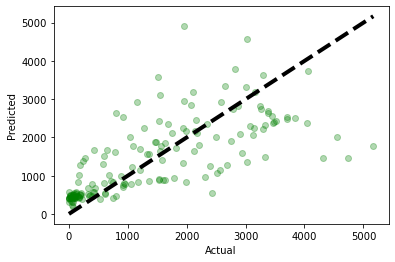

In [308]:
y_predicted4 = cross_val_predict(linreg, X_train_scaled14, y_train4, cv=kf)
plt.scatter(y_train4, y_predicted4, alpha=0.3, color='green')
plt.plot([y_train4.min(), y_train4.max()], [y_train4.min(), y_train4.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

### Random Forest Regressor model
#### Using the optimal hyperparameters from the first Random Forest training.

In [309]:
RFR = RandomForestRegressor()


kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_standardized4 = cross_val_score(RFR, X_train_scaled14, y_train4, cv=kf)
y_predict_standardized4 = cross_val_predict(RFR, X_train_scaled14, y_train4, cv=kf)
mae_standarsized4 = MAE(y_train4, y_predict_standardized4)

print("R2 score:" +(str)(R2_scores_standardized4.mean()))
print("MAE score:" +(str)(mae_standarsized4))


R2 score:0.6519002186236107
MAE score:490.00107784431134


#### We got a much higher score, now let's try to improve it using Random Forest hyperparameters


In [310]:

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 84, stop = 250, num = 25)]  #this is afrer traying bigger range and finding the optimal range
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [311]:
# search across 100 different combinations
rf_random4 = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
rf_random4.fit(X_train_scaled14, y_train4)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [84, 90, 97, 104, 111,
                                                         118, 125, 132, 139,
                                                         146, 153, 160, 167,
                                                         173, 180, 187, 194,
                                        

In [312]:
print("best R2 score is:")
print(rf_random4.best_score_)

best R2 score is:
0.6620123916355303


### Changing the parameters and checking the model score

In [313]:
rf_random4.best_params_

{'n_estimators': 194,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [315]:
RFR = RandomForestRegressor(n_estimators =194,min_samples_split = 2,min_samples_leaf = 1,max_features ='auto',max_depth = 20,bootstrap = True)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_standardized4 = cross_val_score(RFR , X_train_scaled14, y_train4, cv=kf)
y_predict_standardized4 = cross_val_predict(RFR , X_train_scaled14, y_train4, cv=kf)
mae_standarsized4 = MAE(y_train4, y_predict_standardized4)
print("R2 score:" +(str)(R2_scores_standardized4.mean()))
print("MAE score:" +(str)(mae_standarsized4))

R2 score:0.6601259638316419
MAE score:500.9353972467436


### KNN model

In [316]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
k_r2_scores = []
k_mae_scores = []
k_range = range(30)
for K in k_range:
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    R2_scores_standardized = cross_val_score(model, X_train_scaled14, y_train4, cv=kf)
    k_r2_scores.append(R2_scores_standardized.mean())
    y_predict_standardized = cross_val_predict(model, X_train_scaled14, y_train4, cv=kf)
    mae_standarsized = MAE(y_train4, y_predict_standardized4)
    k_mae_scores.append(mae_standarsized4)
        
print(k_r2_scores)
print(k_mae_scores)

[0.4225743447957443, 0.49180074078729863, 0.5855680043764532, 0.5958718469831531, 0.5640953913889627, 0.5798790143443003, 0.5673896211036165, 0.5715506127693587, 0.5387602724140589, 0.5569789491745075, 0.547337254410343, 0.5463815486294654, 0.5451180898804084, 0.5398406692861297, 0.5397798231386856, 0.5306633450426665, 0.5327327398450636, 0.5296531771461103, 0.5257464904646492, 0.5212932221469231, 0.527646404757051, 0.5276100021136415, 0.5309099437994828, 0.5260630430750679, 0.5227634302669171, 0.5154676333470014, 0.5108412639179165, 0.5136978322351384, 0.5091481468620199, 0.5024468065261272]
[500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 500.9353972467436, 

Text(0, 0.5, 'Cross-Validated Accuracy')

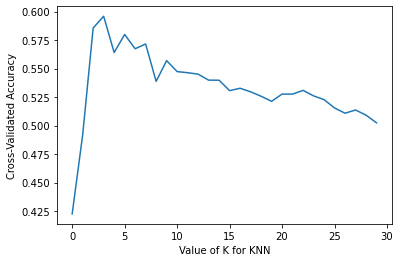

In [317]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_r2_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [318]:
print("Optimal k = "+ (str)(k_r2_scores.index(max(k_r2_scores))+1))

Optimal k = 4


In [320]:
model = neighbors.KNeighborsRegressor(n_neighbors = 4)
R2_scores_standardized = cross_val_score(model, X_train_scaled14, y_train4, cv=kf)
k_r2_scores.append(R2_scores_standardized.mean())
y_predict_standardized = cross_val_predict(model, X_train_scaled14, y_train4, cv=kf)
mae_standarsized = MAE(y_train4, y_predict_standardized4)


print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))

R2 score:0.5958718469831531
MAE score:500.9353972467436


### Lets have a look at all the scores

In [322]:
data  = {'scores' :['R2','MAE'],
         'dummy':[-4.99, 976],
         'LinearRegression':[0.481, 656.378]
        ,'Random Forest':[0.66, 500.935],
         'KNN': [0.595,500.935]}

data = pd.DataFrame(data) 
final_scores3 = data.set_index('scores')
final_scores3

,dummy,LinearRegression,Random Forest,KNN
scores,,,,
R2,-4.99,0.481,0.660,0.595
MAE,976.00,656.378,500.935,500.935


### We found that our hypothesis was correct and the number of rows in our table was more important than two other influencing features.
### We learned from this about the great importance of a large data set.
#### We thought that maybe if we had taken our original table without merging it with the percentage of vaccinated (which produces more entries in the table) perhaps the model will perform better - 

In [323]:
df3 = df3.set_index('Country')
df3.head(1)

,TotalRecovered,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,,
USA,53037045,8636,241047,2911,2835143,334210037,79442


In [324]:
df3 = df3.replace(regex=['%'], value='') 
df3 = df3.replace(regex=[''], value=np.nan) # empty valuse
df3['Serious,Critical'].fillna('0', inplace = True)
df3 = df3.replace(regex=['N/A'], value=np.nan) # empty valuse


In [325]:
df3.dropna()
df3.shape

(234, 7)

In [327]:
for i in df3:
    df3[i] = df3[i].astype(float, errors = 'raise')

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, USA to Total:
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalRecovered       226 non-null    float64
 1   Serious,Critical     234 non-null    float64
 2   Tot Cases/1M pop     225 non-null    float64
 3   Deaths/1M pop        216 non-null    float64
 4   Tests/
1M pop
       210 non-null    float64
 5   Population           224 non-null    float64
 6   Active Cases/1M pop  220 non-null    float64
dtypes: float64(7)
memory usage: 14.6+ KB


In [328]:
for rows in range (0,234):
    df3['Serious,Critical'][rows] = df3['Serious,Critical'][rows] / df3['Population'][rows] * 1000000  


In [329]:
del df3['TotalRecovered']


In [330]:
df3.head()

,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Tests/\n1M pop\n,Population,Active Cases/1M pop
Country,,,,,,
USA,25.840038,241047.0,2911.0,2835143.0,3.342100e+08,79442.0
India,6.377543,30601.0,366.0,546010.0,1.402421e+09,79.0
Brazil,38.678278,133658.0,3018.0,296556.0,2.150561e+08,9358.0
France,37.916600,345687.0,2107.0,3764642.0,6.551220e+07,28122.0
UK,4.220500,274621.0,2354.0,7014818.0,6.847530e+07,21764.0


In [331]:
df3.isnull().sum()

Serious,Critical       10
Tot Cases/1M pop        9
Deaths/1M pop          18
Tests/\n1M pop\n       24
Population             10
Active Cases/1M pop    14
dtype: int64

In [332]:
df3=df3.dropna()
df3.shape

(206, 6)

### Removing outliers

In [333]:
def removeOutlier(att, df):

    lowerbound = att.mean() - 3 * att.std()
    upperbound = att.mean() + 3 * att.std()
    print('lowerbound: ',lowerbound,' -------- upperbound: ', upperbound )

    df1 = df[(att > lowerbound) & (att < upperbound)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************\n')
    
    df = df1.copy()
    return df

In [334]:
df3 = df3.set_axis(['Serious','TotCases1MPop', 'Deaths1MPop', 'Tests1MPop', 'Population', 'ActiveCases1MPop'
], axis=1, inplace=False)

In [335]:
df3 = removeOutlier(df3.Serious, df3)
df3 = removeOutlier(df3.TotCases1MPop, df3)
df3 = removeOutlier(df3.Deaths1MPop, df3)
df3 = removeOutlier(df3.Tests1MPop, df3)
df3 = removeOutlier(df3.Population, df3)
df3 = removeOutlier(df3.ActiveCases1MPop, df3)

lowerbound:  -149.2176509504004  -------- upperbound:  202.78655436009495
4  number of outliers from  206
 ******************************************************

lowerbound:  -255007.92599137244  -------- upperbound:  502680.3517339467
1  number of outliers from  202
 ******************************************************

lowerbound:  -2416.5326805703426  -------- upperbound:  4662.144620868849
3  number of outliers from  201
 ******************************************************

lowerbound:  -6815249.103879229  -------- upperbound:  10091583.528121654
5  number of outliers from  198
 ******************************************************

lowerbound:  -408863406.8561449  -------- upperbound:  488993919.3121034
2  number of outliers from  193
 ******************************************************

lowerbound:  -136329.59712479322  -------- upperbound:  180861.0400567304
6  number of outliers from  191
 ******************************************************



### Train test split

In [336]:
X = df3.drop("Deaths1MPop", axis=1)
y = df3["Deaths1MPop"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)


### Dummy model

In [337]:
dum_regr = DummyRegressor(strategy="mean")
dum_regr.fit(X_train, y_train)
dum_score = dum_regr.score(X_test, y_test)
y_predict = dum_regr.predict(X_test)
mean_absolute_error = MAE(y_test, y_predict)
print('our dummy model R squared score is ' + str(dum_score)[:6])
print( "our dummy mean absolute error is " + str(mean_absolute_error)[:4])

our dummy model R squared score is -2.503
our dummy mean absolute error is 908.


### Scaling the data

In [338]:
scaler1 = StandardScaler()


X_train_scaled1 = scaler1.fit_transform(X_train)
X_test_scaled1 = scaler1.fit_transform(X_test)

### Linear Regression model

In [339]:
linreg = LinearRegression()
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_1 = cross_val_score(linreg, X_train_scaled1, y_train, cv=kf)
y_predict_1 = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
mae_1 = MAE(y_train, y_predict_1)


print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_1.mean()))
print("MAE score:" +(str)(mae_1))


result for StandardScaler:
R2 score:0.23295295542355685
MAE score:616.336746777328


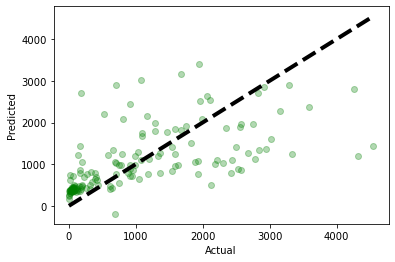

In [340]:
y_predicted = cross_val_predict(linreg, X_train_scaled1, y_train, cv=kf)
plt.scatter(y_train, y_predicted, alpha=0.3, color='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

### Random Forest Regressor
#### Using the optimal hyperparameters from the first Random Forest training.

In [341]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR, X_train_scaled1, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_scaled1, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)
print("result for StandardScaler:")
print("R2 score:" +(str)(R2_scores_standardized.mean()))
print("MAE score:" +(str)(mae_standarsized))

result for StandardScaler:
R2 score:0.32324567448398733
MAE score:509.639244915018


### KNN model

In [342]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
k_r2_scores = []
k_mae_scores = []
k_range = range(60)
for K in k_range:
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    R2_scores_standardized = cross_val_score(model, X_train_scaled1, y_train, cv=kf)
    k_r2_scores.append(R2_scores_standardized.mean())
    y_predict_standardized = cross_val_predict(model, X_train_scaled1, y_train, cv=kf)
    mae_standarsized = MAE(y_train, y_predict_standardized)
    k_mae_scores.append(mae_standarsized)
    
    
print(k_r2_scores)
print(k_mae_scores)

[-0.14517193231621456, 0.03237202014298526, 0.21037777310040973, 0.22112546722793072, 0.2381767955803335, 0.23601887285427398, 0.27065714935405616, 0.29738173909856597, 0.30067405713079076, 0.3045729617594783, 0.3065565744476819, 0.32362343303889834, 0.34390865902051565, 0.3487581296845229, 0.35106608243065285, 0.3659646988796509, 0.3590069969247196, 0.3634085779490256, 0.35273576334868795, 0.36032278844601934, 0.36757066928758814, 0.36609043244512424, 0.3625034330567977, 0.36991275401773166, 0.37119412545509456, 0.3703124352698037, 0.372782109088739, 0.3677225526505438, 0.36771166699294444, 0.3658029444553193, 0.37546241289545107, 0.36452259371350515, 0.36302004773126206, 0.3567416858337963, 0.3618000907555668, 0.3554792188778745, 0.3583174660048548, 0.3537571188979827, 0.3494223541844238, 0.3438754492720511, 0.3392683605902627, 0.3431135955668916, 0.34341495485917284, 0.3387494676542878, 0.32944190975793436, 0.3267456272531012, 0.3178257864085362, 0.31849278791876207, 0.3134922008817

best k = 31
0.37546241289545107
541.04914004914


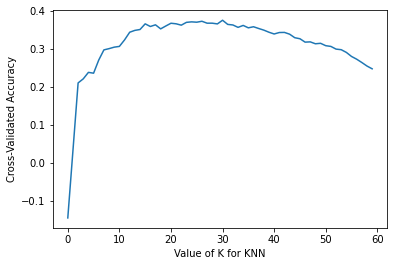

In [343]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_r2_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

print ("best k = "+ (str)(k_r2_scores.index(max(k_r2_scores))+1))
print (max(k_r2_scores))
print (min(k_mae_scores))

### Lets have a look at all the scores

In [346]:
data  = {'scores' :['R2','MAE'],
         'dummy':[-2.503, 908],
         'LinearRegression':[0.232, 616.336]
        ,'Random Forest':[0.323, 509.639],
         'KNN': [0.375,541.049]}

data = pd.DataFrame(data) 
final_scores4 = data.set_index('scores')
final_scores4


,dummy,LinearRegression,Random Forest,KNN
scores,,,,
R2,-2.503,0.232,0.323,0.375
MAE,908.000,616.336,509.639,541.049


### We can clearly see that the scores are much lower than our previous tables.


In [347]:
result = pd.concat([final_scores1, final_scores2,final_scores3,final_scores4],keys=["final_scores1", "final_scores2", "final_scores3","final_scores4"])
result 

dummy  LinearRegression  Random Forest      KNN
              scores                                                   
final_scores1 R2       -0.048             0.443          0.565    0.537
              MAE     864.000           602.781        508.113  526.903
final_scores2 R2       -0.012             0.404          0.434    0.409
              MAE     958.000           595.218        558.831  558.285
final_scores3 R2       -4.990             0.481          0.660    0.595
              MAE     976.000           656.378        500.935  500.935
final_scores4 R2       -2.503             0.232          0.323    0.375
              MAE     908.000           616.336        509.639  541.049

 - final_scores1 = the table of vaccination merged with the table with data from all over the world
 - final_scores2 = final_scores1 merged with the table with "physician" and "hospital_beds"
 - final_scores3 = adding USA states to final_scores1
 - final_scores4 = only the table with data from all over the world (no vaccination)

#### As we can see the best r2 score is 0.66 using final_scores3 tables and Random Forest Regressor

# <font color='green'> Testing best table and model: </font>

In [351]:
RFR = RandomForestRegressor(n_estimators =236,min_samples_split = 5,min_samples_leaf = 1,max_features ='auto',max_depth = 70,bootstrap = True)
RFR.fit(X_train_scaled14, y_train4)

R2_score = RFR.score(X_test_scaled14, y_test4)
y_predict = RFR.predict(X_test_scaled14)
mae_score = MAE(y_test4, y_predict)
print("R2 score:" +(str)(R2_score))
print("MAE score:" +(str)(mae_score))

R2 score:0.5271045871172549
MAE score:533.8763616632335


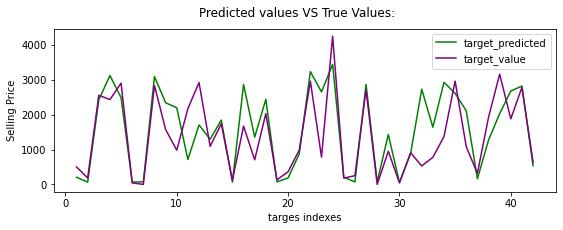

In [352]:
indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='green')
axs.plot(indexes, y_test4, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

# <font color='green'> Testing the other models: </font>

#### Linear Regression

In [355]:
linreg = LinearRegression()
linreg.fit(X_train_scaled14, y_train4)

R2_score = linreg.score(X_test_scaled14, y_test4)
y_predict = linreg.predict(X_test_scaled14)
mae_score = MAE(y_test4, y_predict)

print("R2 score:" +(str)(R2_score))
print("MAE score:" +(str)(mae_score))

R2 score:0.3509315694960975
MAE score:642.673954253548


#### KNN

In [356]:
KNN = neighbors.KNeighborsRegressor(n_neighbors =4)

KNN.fit(X_train_scaled14, y_train4)
R2_score = KNN.score(X_test_scaled14, y_test4)
y_predict = KNN.predict(X_test_scaled14)
mae_score = MAE(y_test4, y_predict)
    
print("R2 score:" +(str)(R2_score))
print("MAE score:" +(str)(mae_score))

R2 score:0.26933566970155176
MAE score:697.0357142857143


# <font color='green'> Summary and Conclusions </font>

- In the test results we received lower accuracy scores in all our models, but we did get the highest score in the best model (Random Forest) that we chose.

- We estimate that for small data sets it is simple to get your model to be "over fitting" and this is probably what happened to us.


- We could continue working on the model for much longer, to merge different tables, test more models and more.


- We see in our data a great potential and we are sure that if we had a larger data set our model score would be much higher.


- We learned from the project about the importance of finding a large and diverse data set. In this project we tried to find the balance between keeping more rows and adding important features. This is a very important lesson for any beginning data scientist and we are glad that we lerned it through this project.